## Data analysis

In [1]:
#importing libraries and storing data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
data = np.concatenate([x,y.reshape(-1,1)], axis = 1)
cols=['sepal_length','sepal_width','petal_length','petal_width', 'species']

In [2]:
#checking how the data looks like.
data[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

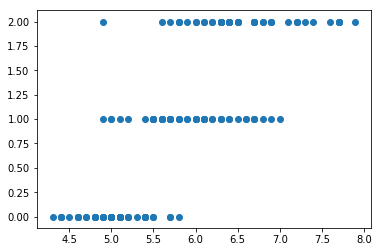

In [3]:
plt.scatter(x[:,0],y)
#It can be seen that datapoints with saple length less than
#5.5 are mostly in category 0 (target value).

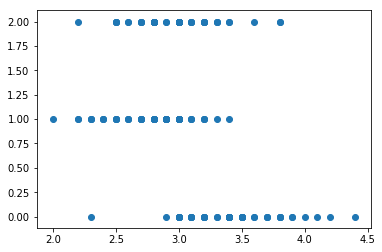

In [4]:
print(plt.scatter(x[:,1], y))
#datapoints with saple width greater than 3.5 are usually
#from category 0 (target value).

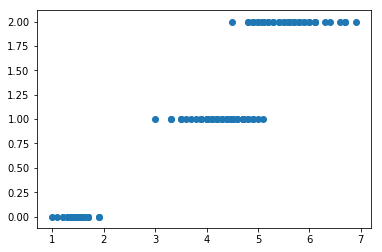

In [5]:
plt.scatter(x[:,2], y)
#shows much clear distinction than previous two features

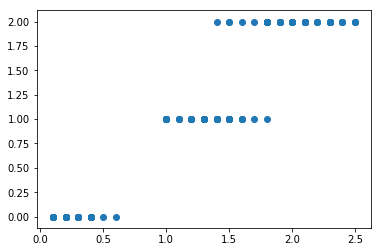

In [6]:
plt.scatter(x[:,3], y)
#petal features are better to split upon at first 
#because a clearer distinction can be seen.

## Making the decision tree
Starting by making a query class that decides where to split

In [7]:
class Query:
    #'feature' is the feature that we're splitting upon and 
    #value is the value on which query is happening
    #so, if the value of the parameter is greater than 'value'
    #then the query results in a yes  else it's a no.
    def __init__(self, feature, value):
        self.feature = feature
        self.value = value
    #The function below returns true if the value is greater than
    #the value passed in the parameter
    def match(self, data):
        value = data[self.feature]
        if value>=self.value:
            return True
        else:
            return False
        #The below function is formal representation of object and is for printing the query
    def __repr__(self):
        return "Is %s >= %s?" % (cols[self.feature], str(self.value))
    

Now making a dictionary and counting unique values of categories

In [8]:
def count_values(rows):
    #dictionary will have keys as target and values 
    #as count of target
    count = {}
    #traversing the targets
    for row in rows: 
        if row[-1] not in count:
            count[row[-1]] = 0
        #increasing value by 1
        count[row[-1]]+=1
    #returning the dictionary
    return count

In [9]:
#Testing the function
count_values(data)

{0.0: 50, 1.0: 50, 2.0: 50}

In [10]:
#function for making partitions into true and false rows
def partition(rows, query):
    #making a list for both rows
        true_row, false_row = [], []
        for row in rows:
            if query.match(row):
                #if true, then append in true row
                true_row.append(row)
            else:
                #if false, then append in false row
                false_row.append(row)
                #return both rows
        return true_row, false_row

In [11]:
#testing the partition function
print(Query(0,5))
#t_r represents true_rows and f_r false_rows
t_r,f_r=partition(data,Query(0,5))
#thus t_r will only contain sepal legnth values > 5cm
t_r

Is sepal_length >= 5?


[array([5.1, 3.5, 1.4, 0.2, 0. ]),
 array([5. , 3.6, 1.4, 0.2, 0. ]),
 array([5.4, 3.9, 1.7, 0.4, 0. ]),
 array([5. , 3.4, 1.5, 0.2, 0. ]),
 array([5.4, 3.7, 1.5, 0.2, 0. ]),
 array([5.8, 4. , 1.2, 0.2, 0. ]),
 array([5.7, 4.4, 1.5, 0.4, 0. ]),
 array([5.4, 3.9, 1.3, 0.4, 0. ]),
 array([5.1, 3.5, 1.4, 0.3, 0. ]),
 array([5.7, 3.8, 1.7, 0.3, 0. ]),
 array([5.1, 3.8, 1.5, 0.3, 0. ]),
 array([5.4, 3.4, 1.7, 0.2, 0. ]),
 array([5.1, 3.7, 1.5, 0.4, 0. ]),
 array([5.1, 3.3, 1.7, 0.5, 0. ]),
 array([5. , 3. , 1.6, 0.2, 0. ]),
 array([5. , 3.4, 1.6, 0.4, 0. ]),
 array([5.2, 3.5, 1.5, 0.2, 0. ]),
 array([5.2, 3.4, 1.4, 0.2, 0. ]),
 array([5.4, 3.4, 1.5, 0.4, 0. ]),
 array([5.2, 4.1, 1.5, 0.1, 0. ]),
 array([5.5, 4.2, 1.4, 0.2, 0. ]),
 array([5. , 3.2, 1.2, 0.2, 0. ]),
 array([5.5, 3.5, 1.3, 0.2, 0. ]),
 array([5.1, 3.4, 1.5, 0.2, 0. ]),
 array([5. , 3.5, 1.3, 0.3, 0. ]),
 array([5. , 3.5, 1.6, 0.6, 0. ]),
 array([5.1, 3.8, 1.9, 0.4, 0. ]),
 array([5.1, 3.8, 1.6, 0.2, 0. ]),
 array([5.3, 3.7, 1.

In [12]:
#function for finding gini index
def gini(rows):
    #making count dictionary
    count = count_values(rows)
    #solving for gini index
    gini_val = 1
    for output in count:
        #finding probability of target value
        prob = count[output]/len(rows)
        #using probability to find gini index
        gini_val -= prob**2
        #returning gini value
    return gini_val

In [13]:
#testing the function 
gini(data)

0.6666666666666665

In [14]:
#writing a function to calculate entropy
def entropy(rows):
    #initialise entropy
    entropy=0
    #import math class
    from math import log
    #calculating log(x) in base 2 using lambda function
    log2=lambda x:log(x)/log(2)
    count=count_values(rows)
    #storing and traversing the dictionary
    for label in count:
        #probablity of each unique label
        p=count[label]/float(len(rows))
        #calculating entropy
        entropy-=p*log2(p)
        #returning entropy
    return entropy

In [15]:
#testing the function
entropy(data)

1.584962500721156

In [16]:
#calculating information gain for gini index
def info_gain_gini(current,left,right):
    #probability of each branch
    p =float(len(left))/len(left)+len(right)
    #returning gini information gain
    return current-p*gini(left)-(1-p)*gini(right)

In [17]:
#calculating info gain for entropy
def info_gain_entropy(current,left,right):
    p =float(len(left))/len(left)+len(right)
    #returning information gain for entropy
    return current-p*entropy(left)-(1-p)*entropy(right)

In [18]:
#making a function that decides the best split
def best_split(rows):
    #initializing best gain and best query
    best_gain = 0
    best_query = None
    #solving for current gini index
    current = gini(rows)
    features = len(rows[0])-1
    #finding best split from every column
    for col in range(features):
        #making set of different values for all features to use in query
        values = set([row[col] for row in rows])
        for val in values:
            query = Query(col, val)
            #partitioning in true and false rows
            true_rows, false_rows = partition(rows, query)
            #if one of the rows is 0, it's no use to go further
            #as all the three target values are in one of the rows
            if len(true_rows) == 0 or len(false_rows) ==0:
                continue
            #finding information gain in the split
            gain = info_gain_gini(current, true_rows, false_rows)
            #comparing to see if the gain is actually the best gain
            if gain>= best_gain:
                best_gain, best_query = gain, query
    return best_gain, best_query

In [19]:
#Testing the function
a,b=best_split(data)
print(b,a)

Is petal_length >= 6.9? 99.99552572706934


In [20]:
#Making a class to represent all nodes in the decision tree
class decisionNode:
    def __init__(self,query,true_branch,false_branch):
        #query object stores feature and value variables regarding the query of that node
        self.query = query
        #storing true branch
        self.true_branch = true_branch
        #storing false branch
        self.false_branch = false_branch

In [21]:
#making a class to store leaf nodes
#leaf nodes can occur if either the splits leads to 100% purity or there's no feature to split upon
class leaf:
    def __init__(self,rows):
        #stores outputs and their values in predictions
        self.predictions=count_values(rows)

In [22]:
#building the whole tree
def build_tree(rows):
    #getting the best gain and best query
    gain,query=best_split(rows)
    
    #if gian=0, leaf node
    if gain==0:
        #make a leaf object and return
        return leaf(rows)
    #If we reach here, we have found a useful feature
    #to split upon
    true_rows, false_rows = partition(rows, query)

    #Using recursion to build the true branch
    true_branch = build_tree(true_rows)

    #Using recursion to build the false branch
    false_branch = build_tree(false_rows)

    #returns the root query node storing branches as well as the query
    return decisionNode(query, true_branch, false_branch)

In [23]:
tree = build_tree(data)

In [24]:
#making a function to find split info
def  split_info(left,right):
    num=float(len(left)) #numerator
    den=len(left)+len(right) #denominator
    p=num/den #finding probability
    from math import log
    #using lambda function to find log10
    log10=lambda x:log(x)/log(10)
    #returning the split info 
    return -(log10(p)*p+(1-p)*log10(1-p))

In [25]:
#writing the function to print the decision tree
def print_tree_output(data,level):
    gain,question=best_split(data)
    #base case means we have reached the leaf node
    #if the node object is of leaf type
    if gain==0:
        #printing the level
        print("Level ",level)
        #making the count dictionary
        count=count_values(data)
        #printing for different output values
        for value in count:
            print("Count of ",value," = ",count[value])
            #printing output
        print("Current entropy is = ",entropy(data))
        print("Reached Leaf Node") 
        #return from base case
        return 
    #not a base case
    print('Level ',level)
    #count dictionary
    count=count_values(data)
    #finding counts of differnt outputs
    for value in count:
        print("Count of ",value," = ",count[value])
    feature=question.feature
    #partitioning the rows
    true_rows, false_rows = partition(data, question)
    #finding split info
    split=split_info(true_rows,false_rows)
    #finding entropy gain
    entropy_gain=info_gain_entropy(entropy(data),true_rows,false_rows)
    #printing current entropy
    print("Current entropy is = ",entropy(data))
    #printing gain ratio
    print("Spliting on feature ",cols[feature]," with gain ratio ",entropy_gain/split)
    #recursively calling the function for all branches
    print_tree_output(true_rows,level+1)
    print_tree_output(false_rows,level+1)

In [26]:
print_tree_output(data,0)

Level  0
Count of  0.0  =  50
Count of  1.0  =  50
Count of  2.0  =  50
Current entropy is =  1.584962500721156
Spliting on feature  petal_length  with gain ratio  13668.490189622818
Level  1
Count of  2.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  1
Count of  0.0  =  50
Count of  1.0  =  50
Count of  2.0  =  49
Current entropy is =  1.5848973705351974
Spliting on feature  sepal_width  with gain ratio  13501.92708309278
Level  2
Count of  0.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  2
Count of  0.0  =  49
Count of  1.0  =  50
Count of  2.0  =  49
Current entropy is =  1.5848967831152563
Spliting on feature  sepal_width  with gain ratio  13335.193479394704
Level  3
Count of  0.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  3
Count of  0.0  =  48
Count of  1.0  =  50
Count of  2.0  =  49
Current entropy is =  1.5847621959588345
Spliting on feature  sepal_length  with gain ratio  13169.966225081154
Level  4
Count of  2.0  =  1
Current entropy is =

Level  35
Count of  0.0  =  35
Count of  1.0  =  42
Count of  2.0  =  15
Current entropy is =  1.4735011268840832
Spliting on feature  petal_length  with gain ratio  5160.358405321851
Level  36
Count of  2.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  36
Count of  0.0  =  35
Count of  1.0  =  42
Count of  2.0  =  14
Current entropy is =  1.4604846813131116
Spliting on feature  petal_width  with gain ratio  1999.4905267119523
Level  37
Count of  2.0  =  3
Current entropy is =  0.0
Reached Leaf Node
Level  37
Count of  0.0  =  35
Count of  1.0  =  42
Count of  2.0  =  11
Current entropy is =  1.4133408782419332
Spliting on feature  sepal_length  with gain ratio  4618.34763213731
Level  38
Count of  1.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  38
Count of  0.0  =  35
Count of  1.0  =  41
Count of  2.0  =  11
Current entropy is =  1.4172160753036072
Spliting on feature  sepal_length  with gain ratio  2577.201053968748
Level  39
Count of  1.0  =  2
Current entro

So, code for printing levels works and decision tree algorithm also works.